In [1]:
import numpy as np
import pandas as pd
import matplotlib as mt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Read the CSV file
dataset = pd.read_csv("/content/drive/MyDrive/fb/facebook.csv")
# Display the first few rows
dataset.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


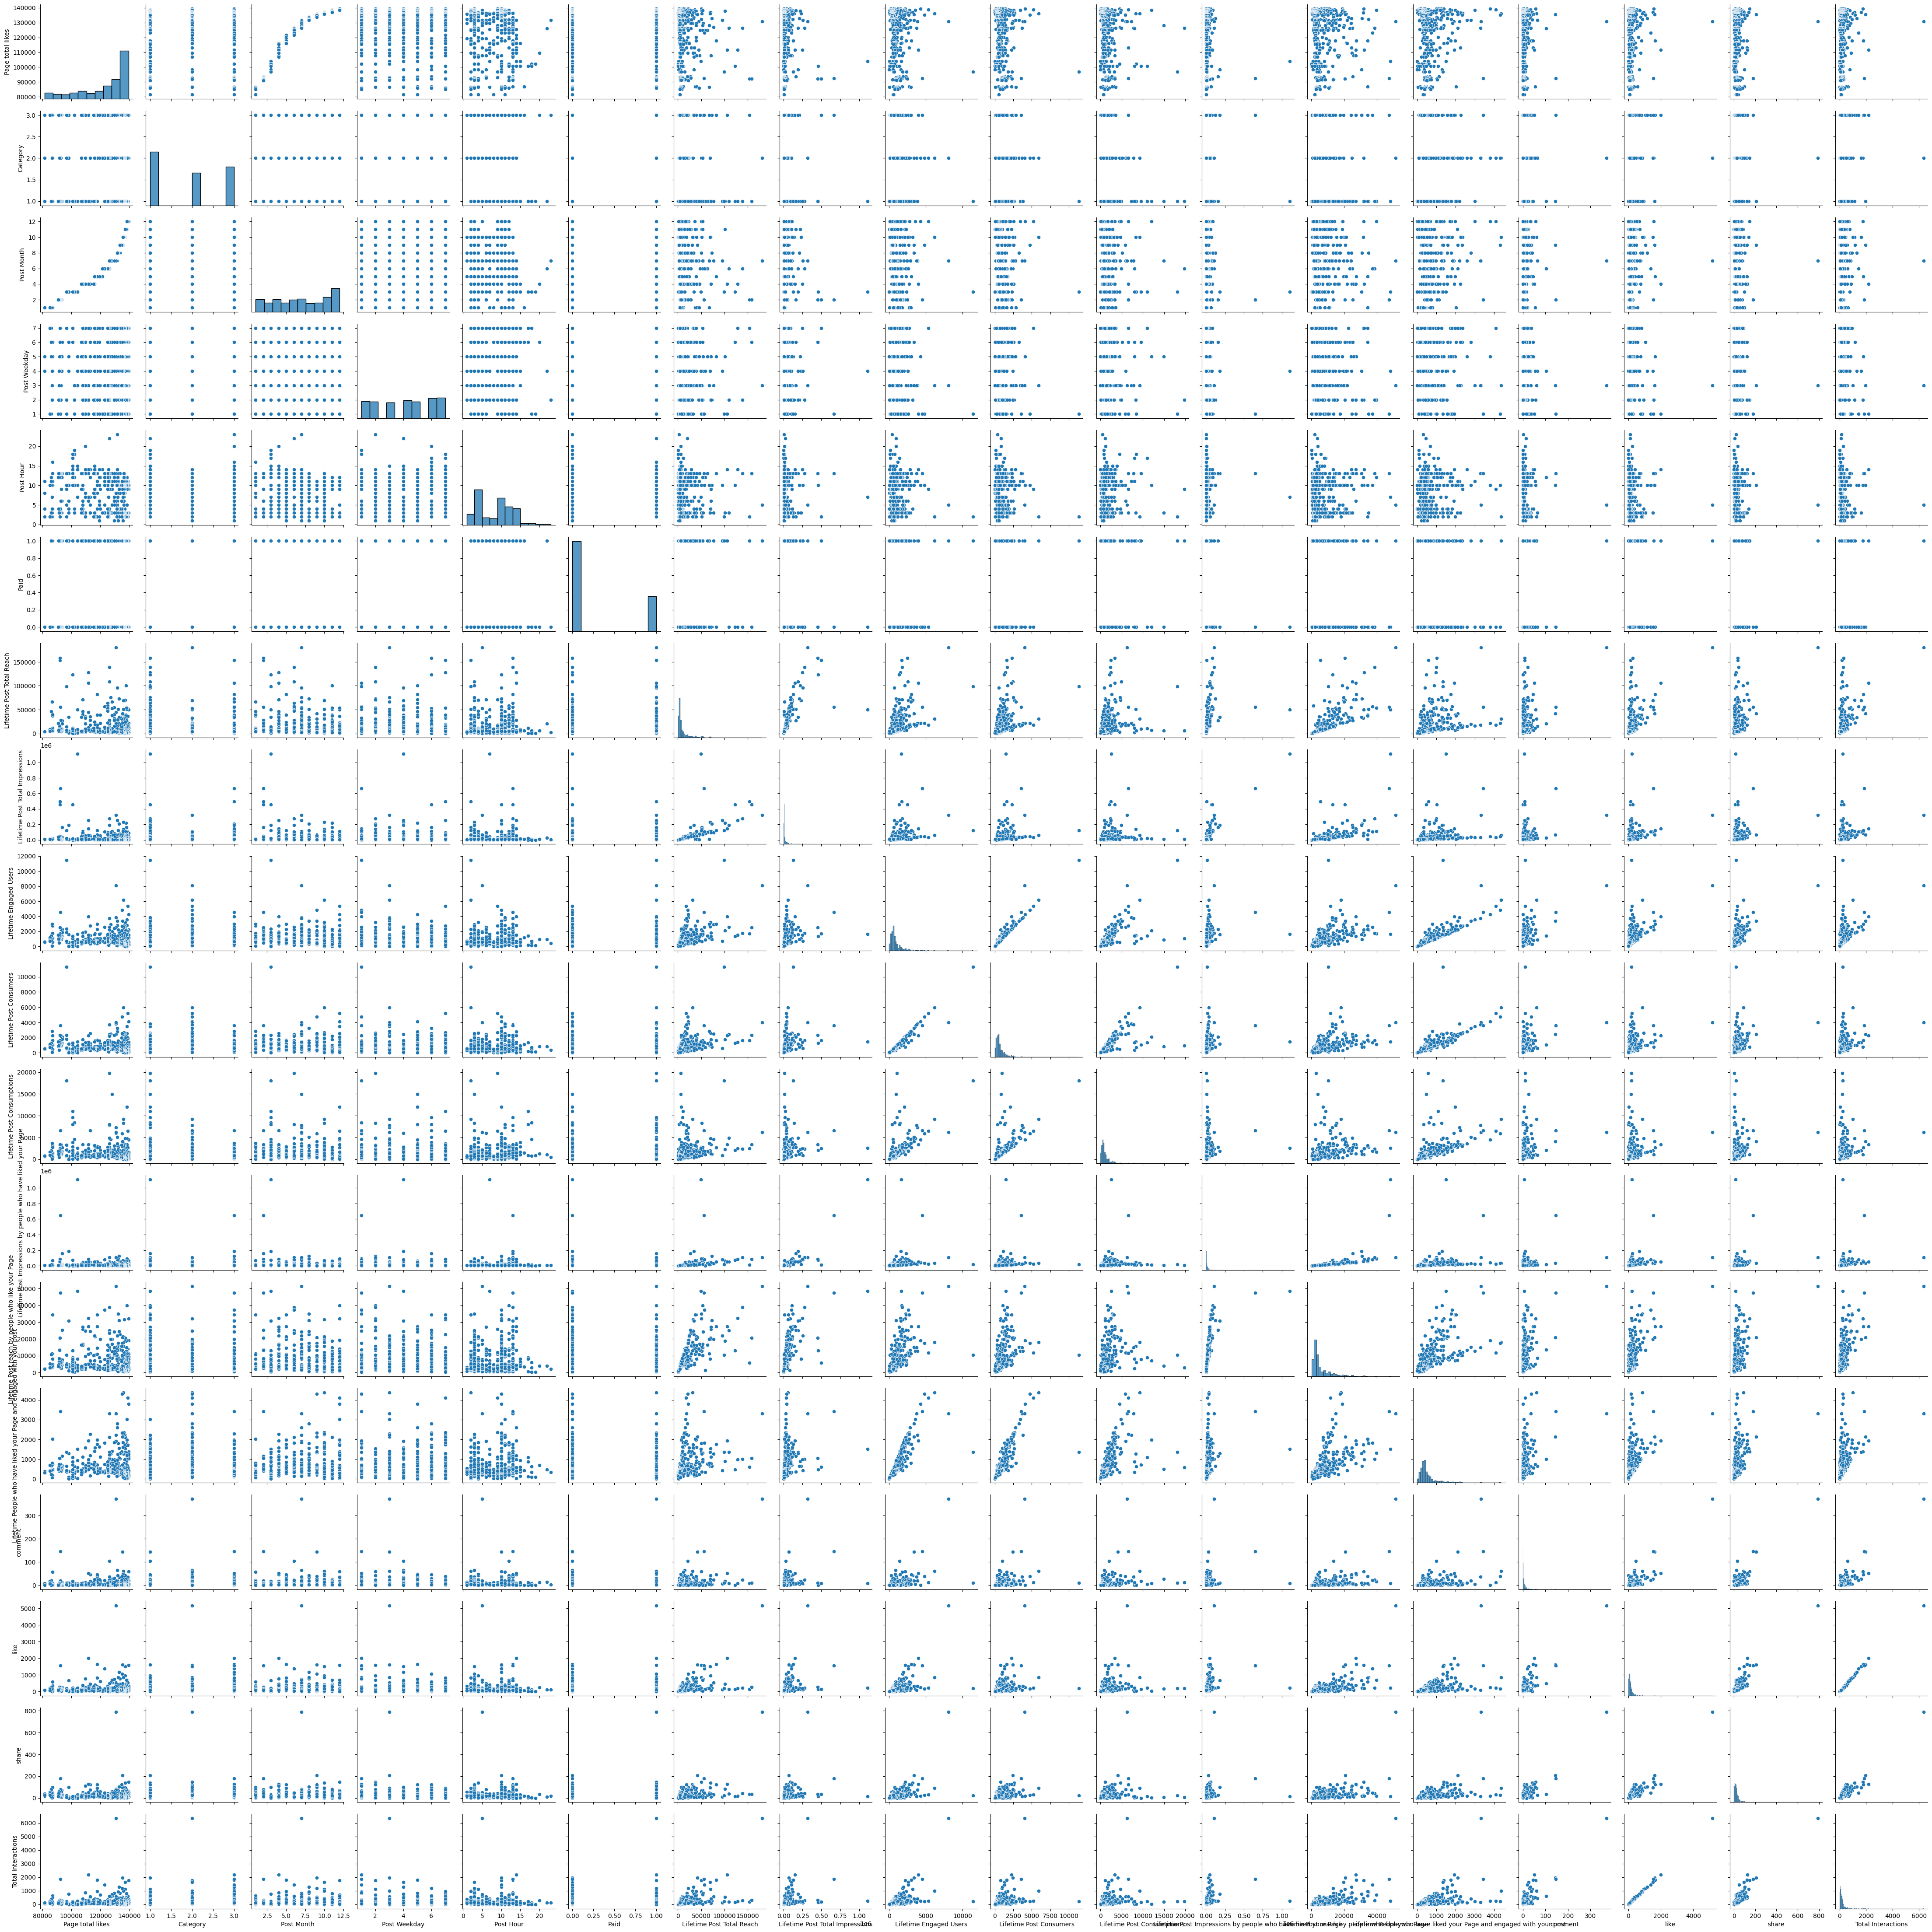

In [4]:
sns.pairplot(dataset)

In [5]:
dataset.shape[0] # number of rows

500

In [6]:
dataset.shape[1] # number of columns

19

Missing Values (Paid, like, share)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

remove rows that contains missing values

In [8]:
dataset = dataset.dropna()

In [9]:
# Check for missing values
missing_values = dataset.isnull().sum()
print(missing_values)

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

from 500 to 495

In [10]:
dataset.shape[0] # number of rows

495

1 indicates a strong positive relationship, close to -1 indicates a strong negative relationship, and close to 0 indicates no relationship.

There is a strong positive correlation between the number of comments, share, and likes to the total interactions.

correlation matrix

In [11]:
# only numeric columns
numeric_columns = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                                                    Page total likes  \
Page total likes                                            1.000000   
Category                                                   -0.084925   
Post Month                                                  0.940892   
Post Weekday                                               -0.012685   
Post Hour                                                  -0.150466   
Paid                                                        0.009406   
Lifetime Post Total Reach                                  -0.082650   
Lifetime Post Total Impressions                            -0.102703   
Lifetime Engaged Users                                     -0.110379   
Lifetime Post Consumers                                    -0.148021   
Lifetime Post Consumptions                                 -0.127574   
Lifetime Post Impressions by people who have li...         -0.096492   
Lifetime Post reach by people who like your Page           -0.05

Text(0, 0.5, 'Total Interactions')

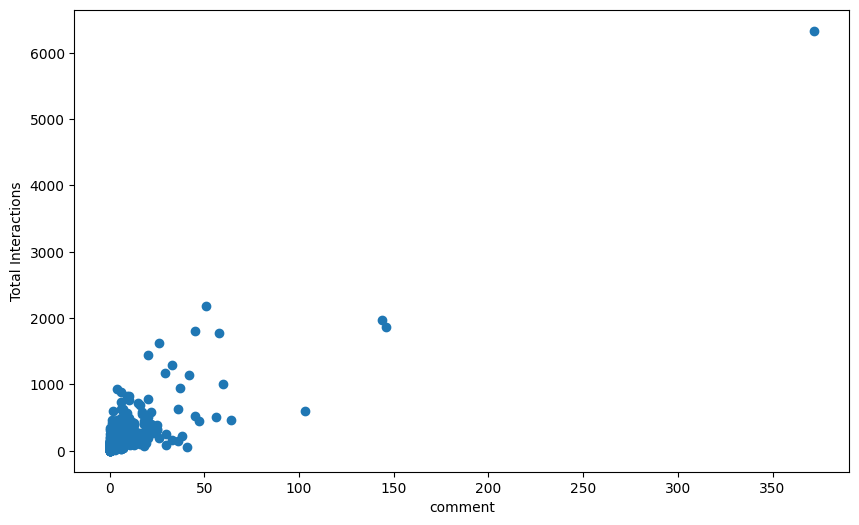

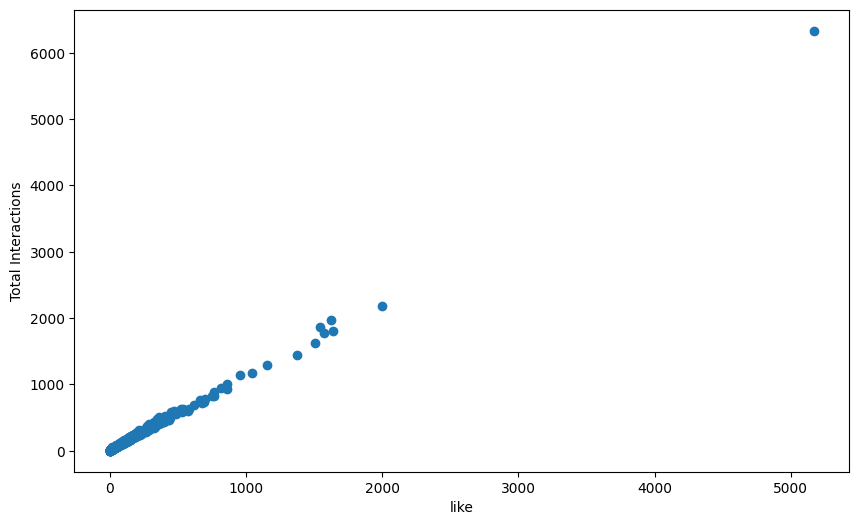

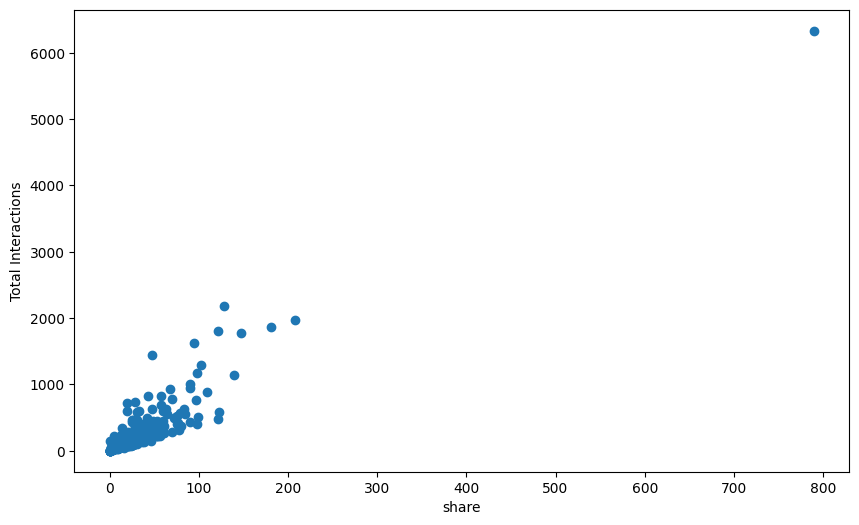

In [12]:
y_post = dataset["Total Interactions"]
x_comment = dataset["comment"]
x_like = dataset["like"]
x_share = dataset["share"]

fig_wt, ax_wt = plt.subplots(1,1, figsize=(10,6))
ax_wt.scatter(x_comment, y_post)
ax_wt.set_xlabel(r'comment')
ax_wt.set_ylabel(r'Total Interactions')

fig_hp, ax_hp = plt.subplots(1,1, figsize=(10,6))
ax_hp.scatter(x_like, y_post)
ax_hp.set_xlabel(r'like')
ax_hp.set_ylabel(r'Total Interactions')

fig_hp, ax_hp = plt.subplots(1,1, figsize=(10,6))
ax_hp.scatter(x_share, y_post)
ax_hp.set_xlabel(r'share')
ax_hp.set_ylabel(r'Total Interactions')

In [13]:
X = dataset[["comment", "like", "share"]]  # Features
y = dataset["Total Interactions"]          # Target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions on the testing set
y_pred = model.predict(X_test)



*    low MSE suggests that the model fits the data
*   small, suggesting that the model's predictions are very accurate.

*    features is really good at predicting how many interactions a post





In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 3.709587529670417e-26
Root Mean Squared Error (RMSE): 1.926028953487049e-13
R-squared (R2): 1.0


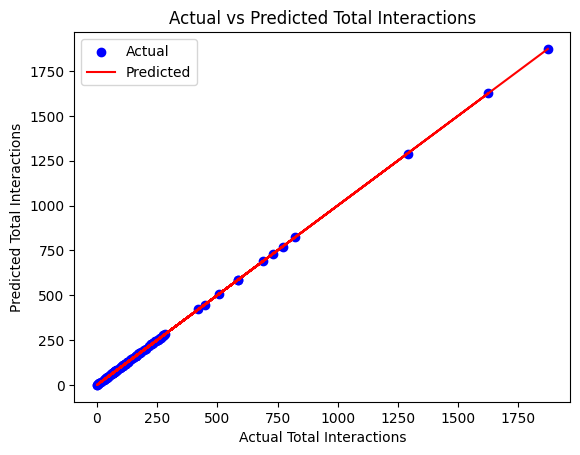

In [18]:
# Visualize the predictions
plt.scatter(y_test, y_pred, color='blue', label='Actual')  # actual
plt.plot(y_test, y_test, color='red', label='Predicted')   # predicted
plt.xlabel("Actual Total Interactions")
plt.ylabel("Predicted Total Interactions")
plt.title("Actual vs Predicted Total Interactions")
plt.legend()
plt.show()